# Introduction to R - Part 2
In the first part we've seen how and what type of data can be stored in R and what are some basic mathematical operations that can be performed on them. This part will focus on more functional aspects of R, i.e. getting data into it through reading and manipulating data sets. 

The following topics will be covered:
4. Reading, writing and manipulating data frames
    1. Reading and writing data frames
    2. Manipulating data frames
1. Making some beautiful plots with ggplot 
1. Relational and advanced vector operators
2. Control statements in R: decision making and looping
3. Functions and packages
    1. Defining your own functions
    2. Functions included in base R
    3. Using function from other packages




##  Reading, writing and manipulating data frames
###  Data in science: a pain in the bum. 
It is not feasible (and it is error-prone!) to enter large data sets into R by hand. We saw last time how we can get data from a CSV file on the internet, and this section explores that concept further. Additionally, data collection in an actual wet-lab most often than not happens using applications that can handle large tables (typically either CSV files, the closely related "tab separated variable" file or TSV files, and others, including Microsoft Excel). 

Therefore, data sets often come in file formats such as .csv or .xlsx (Excel spreadsheets) files -- just like we saw last time, with covid data -- but there are many, MANY other types of file format. In practice, dealing with different file formats is a really big "pain in the bum" -- it's a task that seems like it should be easy, and certainly isn't scientifically interesting, but tends to take up quite a lot of your time. Some other types of data you may find yourself wanting to read include FASTA files (which describe, in a structured form of text, DNA, RNA or amino acid sequences), hdf5 files (which are very structured "metadata heavy" files that _can_ contain almost anything in addition to a database of information about what it is they contain), images and movies (for example, from a microscope, typically in the lossless .tif image format or an animation equivalent), and PDB files, which describe the three-dimensional physical atomic coordinates of biomolecules. 

Why all of this confusion? Well, there two major reasons: if we store the data that we care about in a structured format, it's easier for specialist tools to parse it (i.e. understand it) and not make mistakes that a human might not notice. Also, the nature of the data itself may change the way in which we want to optimally store it on a computer -- plain text, for example, can be compressed far more easily without the loss of information than most images or movies can, and is therefore easier to store on a computer's hard drive if certain tricks are used (the simplest of which is zipping the file in question!) 

Finally, there's one last reason why there are so many irritating file formats out there: 

![Fortunately, the charging one has been solved now that we've all standardized on mini-USB. Or is it micro-USB? Shit.](https://imgs.xkcd.com/comics/standards.png) 
_(With thanks to [xkcd 927](https://xkcd.com/927/))_


### Reading and writing data frames 
In this section we will see how to load these `csv` and `xlsx` file types into R as well as how to write our own data frames into them.  

It's worth noting that the Excel file-format is proprietary, and sometimes error prone. The "old" Excel format, `.xls`, has some fairly substantial limitations on the maximum size of the content it can store. This has lead to lots of horrible errors in the past -- for example, the loss of [covid test results](https://www.theguardian.com/politics/2020/oct/05/how-excel-may-have-caused-loss-of-16000-covid-tests-in-england). There are *many* other data formats beyond these, and it's possible to connect R to a database and pull data off a really, really large store (that may actually be several computers acting as one in disguise). To keep things simple and manageable, we'll stick to `csv` and `xlsx` files as an example.  

To be able to run the examples below, make sure you check out the entire GitHub repository from [here](https://github.com/m-ferenc/Introduction_to_R_HT2021.git) as it contains the relevant data files.  
We will start with reading the .csv file first. To make sure you have ```nafld_dataset.csv``` in your current working directory, check what that directory is and what are it's contents. You can do this like this:


In [1]:
# Ask R what the current working directory is. 
getwd()
# Now list the contents of this directory and check that nafld_dataset.csv is available  -- this prints what is in the current directory
dir()

[1] "/storage/shared/Work/Teaching/Introduction_to_R_HT2022"

[1] "intro_to_R_1.ipynb" "intro_to_R_2.ipynb" "intro_to_R_3.ipynb"
[4] "LICENSE"            "nafld_dataset.csv"  "nafld_dataset.xlsx"
[7] "nafld_dataset2.csv" "nafld_report.Rmd"

R has a built-in CSV reader, ```read.csv()```. This can take several arguments (you can read more about the individual arguments of this and any function, by typing `?read.csv` or `help("read.csv")` and getting help):  
```read.csv(fileName, header=FALSE, sep="")```
* `fileName` - is the name of the CSV file we want to load into R; it can either be a name in the current "working directory", a path to a file on your computer, or a URL to a web-resource 
* `header` - if TRUE, the first row will be considered to contain column labels; if `FALSE` it contains data 
* `sep` - the "comma" in "comma separated variable" files. If empty, white spaces (space, enter or TAB) will be considered as value separators; otherwise a different separator can be specified here. As other languages use commas rather than decimal points, it's not uncommon to see either tab characters (sometimes called `\t` -- the key above caps lock on the keyboard) or semicolons (`;`) here. 

There's also a slightly more modern equivalent, called `read_csv()` from a collection of tools called the tidyverse, which behaves pretty much the same as `read.csv()` but is a _lot_ faster. 

Before customising arguments (other than the file name), it is worth checking whether ```read.csv()``` can figure out on its own what the structure of your data file is. This can often be a successful endeavour and saves you time. Let's give it a go: 

## An example -- fatty liver disease data 


In [1]:
nafldData <- read.csv("nafld_dataset.csv")
str(nafldData)

'data.frame':	30 obs. of  38 variables:
 $ country   : chr  "Italy" "Hong Kong" "Italy" "Italy" ...
 $ continent : chr  "Europe" "Asia" "Europe" "Europe" ...
 $ centre    : chr  "Petta" "Wong" "Petta" "Petta" ...
 $ gender    : chr  "F" "M" "F" "F" ...
 $ age       : int  59 29 54 56 65 61 40 68 53 55 ...
 $ height    : num  1.4 1.7 1.69 1.61 1.7 1.5 1.8 1.65 1.63 1.59 ...
 $ weight    : num  50 69.8 69 62.7 70 54.5 80.3 66 64.5 61.5 ...
 $ bmi       : num  24.1 24.2 24.2 24.2 24.2 24.2 24.2 24.2 24.3 24.3 ...
 $ waist_circ: num  81 NA 92 86 84 87 91 95 91 83 ...
 $ dm2       : chr  "N" "N" "N" "Y" ...
 $ hten      : chr  "Y" "N" "N" "Y" ...
 $ plt       : int  315 232 303 303 217 372 192 196 222 254 ...
 $ inr       : num  1 0.9 1 0.9 1 1 1 1.1 0.9 0.9 ...
 $ bil       : num  0.2 0.9 1.1 0.4 0.9 0.3 0.5 0.6 0.4 0.5 ...
 $ alt       : int  45 141 84 22 84 54 23 32 78 26 ...
 $ ast       : int  23 30 79 19 44 38 22 29 91 19 ...
 $ alp       : int  NA 58 NA NA 66 NA NA 69 NA 53 ...
 $ gg

As you can see, ```read.csv()``` did a great job at figuring out whether there was a header (there was, we can see that the field names are meaningful) and what the separator was (comma, in this case).  

Some information about this dataset: this contains a set of measurements of 38 different parameters on 30 participants in a clinical trial looking at liver function and fatty liver disease, in people. Some of these parameters are information about the participants in question -- their age, height, gender, etc -- and the majority of the others are blood biochemical parameters in the dreaded-unexplained-three-letter-acronymn form. For example, `alt` refers to the serum concentration of the enzyme alanine transaminase, in international units per litre, which is an enzyme highly expressed in the liver. If the liver is damaged, lysed cells release it into the blood -- and hence a measurement of `alt` is an indication of liver damage. Finally, some of the other parameters are clinical diagnoses (e.g. `htn` -- hypertension; high blood pressure; `dm2` -- type two diabetes mellitus). Variables preceded by `bx_` are biopsy-determined and indicate the results determined by a histopathologist, looking at immunohistochemistry stained samples of each patient's liver, on a microscope slide. 

Note that _unlike_ the other problems you have faced before, this dataset does _not_ have nice units attached to it and this makes it harder to understand -- a separate document with a table similar to the one below would likely have been kept with the units of each item in the dataset. I'm personally of the opinion that this could have perhaps been done slightly differently. 

Note also, that some of these variables are factors (e.g. `dm2` is either "yes", `Y`, or "no", `N`); some are numbers, most of the biopsy variables have been _incorrectly_ identified as numbers (they're categorical scores) _and_ some dates have been incorrectly identified as factors by read.csv(). It's a good idea to check data when you import it!

|Abbreviation| Field name| Units|
|:-----------:|:----------|:-----:|
|study_id| Study ID| |
|country| Country| |
|centre| Centre| |
|gender| Gender| |
|age| Age| |
|height| Height| m|
|weight| Weight| kg|
|bmi| BMI| kg/m^2|
|waist_circ| Waist circumference| cm|
|hip_circ| Hip circumference| cm|
|dm2| Type 2 diabetes mellitus| Y/N|
|hten| Hypertension| Y/N|
|plt| Platelet count| x 10^9/l|
|inr| INR| |
|bil| Bilirubin| µmol/l|
|alt| ALT| IU/L|
|ast| AST| IU/L|
|alp| ALP| IU/L|
|ggt| GGT| IU/L|
|alb| Albumin| g/l|
|tchol| Total cholesterol| mmol/l|
|hdl_chol| HDL cholesterol| mmol/l|
|tg| Triglycerides| mmol/l|
|fglu| Fasting blood glucose| mmol/l|
|bx_date| Biopsy date| |
|bx_length| Length of biopsy sample| mm|
|bx_tracts| Number of portal tracts| |
|bx_fib| Fibrosis stage| (NASH CRN 0-4)|
|bx_ball| Ballooning| (0-2)|
|bx_infl| Lobular inflammation| (0-3)|
|bx_steat| Steatosis| (0-3)|
|bx_nas| NAS score| (0-8)|
|te_date| Liver stiffness measurement scan date| |
|bx_te_days| Scan to biopsy interval| days|
|probe| Probe type| XL/M|
|lsm| Median liver stiffness| kPa|
|iqr| IQR| kPa|
|iqr_median|	IQR/Median ratio| |
|success| Success rate| %|


### The same thing, but different. 

Now let's try and read the exact same data set from an Excel spreadsheet. For this, we will need to load an external package, called ```readxl```, that contains the ```read_excel()``` function. Beware about this -- sometimes quite a lot of information can be contained in an Excel spreadsheet in an unconventional way, particularly if it has been written by a person as opposed to a computer, and it's worth checking that it has imported it properly. In particular, it defaults to the first tabbed "sheet" in an `xlsx` file and ignores pictures, graphs, etc.

In [13]:
library(readxl)
nafldData2 <- read_excel("nafld_dataset.xlsx")
str(nafldData2)

tibble [30 × 39] (S3: tbl_df/tbl/data.frame)
 $ studyId   : chr [1:30] "Petta2017" "Petta2017" "Petta2017" "Petta2017" ...
 $ country   : chr [1:30] "Italy" "Hong Kong" "Italy" "Italy" ...
 $ continent : chr [1:30] "Europe" "Asia" "Europe" "Europe" ...
 $ centre    : chr [1:30] "Petta" "Wong" "Petta" "Petta" ...
 $ gender    : chr [1:30] "F" "M" "F" "F" ...
 $ age       : num [1:30] 59.1 29 53.9 55.7 64.7 ...
 $ height    : num [1:30] 1.44 1.7 1.69 1.61 1.7 1.5 1.82 1.65 1.63 1.59 ...
 $ weight    : num [1:30] 50 69.8 69 62.7 70 54.5 80.3 66 64.5 61.5 ...
 $ bmi       : num [1:30] 24.1 24.2 24.2 24.2 24.2 ...
 $ waist_circ: num [1:30] 81 NA 92 86 84 87 91 95 91 83 ...
 $ dm2       : chr [1:30] "N" "N" "N" "Y" ...
 $ hten      : chr [1:30] "Y" "N" "N" "Y" ...
 $ plt       : num [1:30] 315 232 303 303 217 372 192 196 222 254 ...
 $ inr       : num [1:30] 1.02 0.93 0.95 0.9 1.03 1 1 1.09 0.89 0.93 ...
 $ bil       : num [1:30] 0.2 0.877 1.14 0.4 0.877 ...
 $ alt       : num [1:30] 45 141 

You may rightly assume that reading the two different files with different functions should result in identical data sets, after all, the underlying data is identical between the two files. Let's see if this is the case. The ```identical()``` function in R returns TRUE if its arguments are identical or FALSE otherwise.

In [10]:
identical(nafldData, nafldData2)

[1] FALSE

While the underlying data was the same in both files, R returned different data structures when we used the reading functions. For ```read.csv()```, the result was a data frame, with which we are already familiar. ```read_excel()``` has interpreted the type of some variables differently, and additionally returned a tibble, which is an extension to base R data structures -- it's a bit like a data frame on steroids, and amongst other things note that the dates have been interpreted as of the type `POSIXct`, which is indeed a date/time class. This means that you can, for example, add and subtract them using the usual `+` and `-` operators and it just "does the maths" for you correctly behind the scenes. (If you're wondering, `POSIX` is an international set of computer standards, and `ct` stands for "continuous time").  

The good news is that tibbles basically behave as data frames. But the point here is to show that although _these two things look identical, they're not!_ The computer's conception of types of data is important, and arguably confusing to a beginner. There's also a difference with the interpretation of numbers between the tibble at the data frame -- we have `num` instead of `float`, for example (they are broadly speaking the same), and `chr` (or "character") as opposed to automatically-recognised `factor`s.  

* **Q2.1:** What happens if you use `read_csv()` as opposed to `read.csv()` above? (You may need to run a `library("tidyverse")` command)


### Examining this data 
As it turns out, there are quite a lot of fields in this data set which represents blood serum, liver biopsy and liver stiffness measurement related data. However, not all fields contains data for every patient, and are therefore recorded as `NA` (i.e. "not available").  Let's attempt to extract the only columns that contain a value for each patient. We can do this using row indexing:  

In [10]:
colSums(is.na(nafldData2)) # This tells us how many NA's there are for each column, i.e. variable: 

studyId    country  continent     centre     gender        age     height 
         0          0          0          0          0          0          0 
    weight        bmi waist_circ        dm2       hten        plt        inr 
         0          0          3          0          0          0          0 
       bil        alt        ast        alp        ggt        alb      tchol 
         0          0          0         14          0          0          0 
  hdl_chol         tg       fglu    bx_date  bx_length  bx_tracts     bx_fib 
         1          1          0          0          0         15          0 
   bx_ball    bx_infl   bx_steat     bx_nas    te_date bx_te_days      probe 
         3          3          1          3          0          0          0 
       lsm        iqr iqr_median    success 
         0          0          0          1

In [14]:
#If we wanted to create a new data frame where each column has complete data, this is one way to do it: 
completeNafldData <- nafldData2[, colSums(is.na(nafldData2))==0] 
str(completeNafldData)

tibble [30 × 29] (S3: tbl_df/tbl/data.frame)
 $ studyId   : chr [1:30] "Petta2017" "Petta2017" "Petta2017" "Petta2017" ...
 $ country   : chr [1:30] "Italy" "Hong Kong" "Italy" "Italy" ...
 $ continent : chr [1:30] "Europe" "Asia" "Europe" "Europe" ...
 $ centre    : chr [1:30] "Petta" "Wong" "Petta" "Petta" ...
 $ gender    : chr [1:30] "F" "M" "F" "F" ...
 $ age       : num [1:30] 59.1 29 53.9 55.7 64.7 ...
 $ height    : num [1:30] 1.44 1.7 1.69 1.61 1.7 1.5 1.82 1.65 1.63 1.59 ...
 $ weight    : num [1:30] 50 69.8 69 62.7 70 54.5 80.3 66 64.5 61.5 ...
 $ bmi       : num [1:30] 24.1 24.2 24.2 24.2 24.2 ...
 $ dm2       : chr [1:30] "N" "N" "N" "Y" ...
 $ hten      : chr [1:30] "Y" "N" "N" "Y" ...
 $ plt       : num [1:30] 315 232 303 303 217 372 192 196 222 254 ...
 $ inr       : num [1:30] 1.02 0.93 0.95 0.9 1.03 1 1 1.09 0.89 0.93 ...
 $ bil       : num [1:30] 0.2 0.877 1.14 0.4 0.877 ...
 $ alt       : num [1:30] 45 141 84 22 84 54 23 32 78 26 ...
 $ ast       : num [1:30] 23 30 

* **Q2.2:** Using the `complete.cases()` function, can you create another dataframe where we only have participants with complete measurements on _all_ of the 39 variables? How many of the original 30 participants have complete datasets? 

Now let's write this data frame into a different CSV file so we can use it later or pass it on to others to analyse it. Creating CSV files is just as easy as reading them. R provides the ```write.csv()``` function for this purpose:
```write.csv(dataFrameName, fileName)```
* dataFrameName - the data frame we want to save into a CSV file;
* fileName - a character string with the name of the CSV file, including the extension.

In [21]:
write.csv(completeNafldData, "complete_nafld_dataset.csv")

* **Q2.3:** Check that if you read in the file you just wrote, you get the same data back again! 

## Plotting dataframes with ggplot2
This is just a brief recap from last time -- while R comes with a large number of built-in packages (see a list [here](https://www.tutorialspoint.com/r/r_packages.htm)), it is sometimes necessary to have additional functionality, provided by third-party packages.  There are _thousands_ of these --- for example, BioConductR, a "specialist" source of packages for biochemical and biosciences analyses in R, contains about 3000 packages. These are overwhelmingly different analysis methods that you could use for different experiments! 

Now, let's explore this multi-dimensional dataset a bit more graphically. There's a _lot_ of stuff in there, and it's a good idea to see what is going on. 

In [14]:
library("ggplot2")

Now all functions packaged in ```ggplot2``` are available and can be used. As ```ggplot2``` is a graphics and plotting package, let's explore this dataset, graphically. We can start with simple point plots, for example, of things that we expect to correlate: 

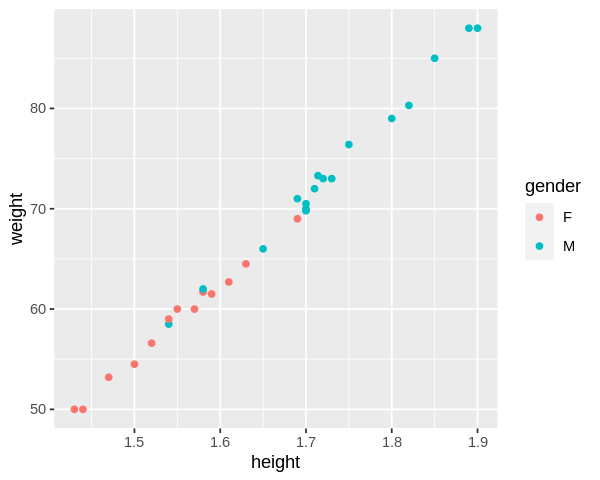

In [34]:
# This makes the plots a little smaller: 
options(repr.plot.width=5, repr.plot.height=4)
# Let's plot height against weight, 
ggplot(data=completeNafldData) + geom_point(aes(x=height,y=weight,color=gender)) # We could use "+xlab()" and "+ylab()" to add labels to the plot, and style the plot. 


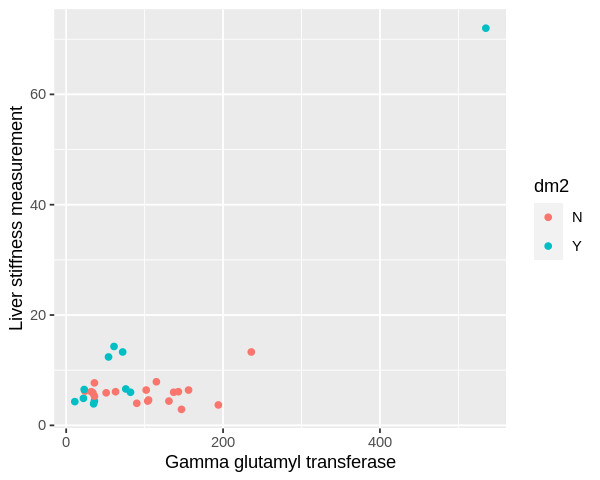

In [46]:
#Let's plot another pair of these, just to see: 
ggplot(data = completeNafldData) + geom_point(aes(x=ggt,y=lsm, color=dm2)) + 
    ylab("Liver stiffness measurement") + xlab("Gamma glutamyl transferase")
#There's an outlier! 

Looking at pairs of data like this is tedious. Let's use an add-on to ggplot, called [GGally](http://ggobi.github.io/ggally/articles/ggpairs.html) to look at _all_ pairs of data in this set: 

In [4]:
install.packages("GGally")

also installing the dependencies ‘ellipsis’, ‘cli’, ‘isoband’, ‘rlang’, ‘glue’, ‘tibble’, ‘tidyselect’, ‘vctrs’, ‘pillar’, ‘farver’, ‘ggplot2’, ‘dplyr’, ‘lifecycle’, ‘reshape’, ‘scales’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
library("GGally")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

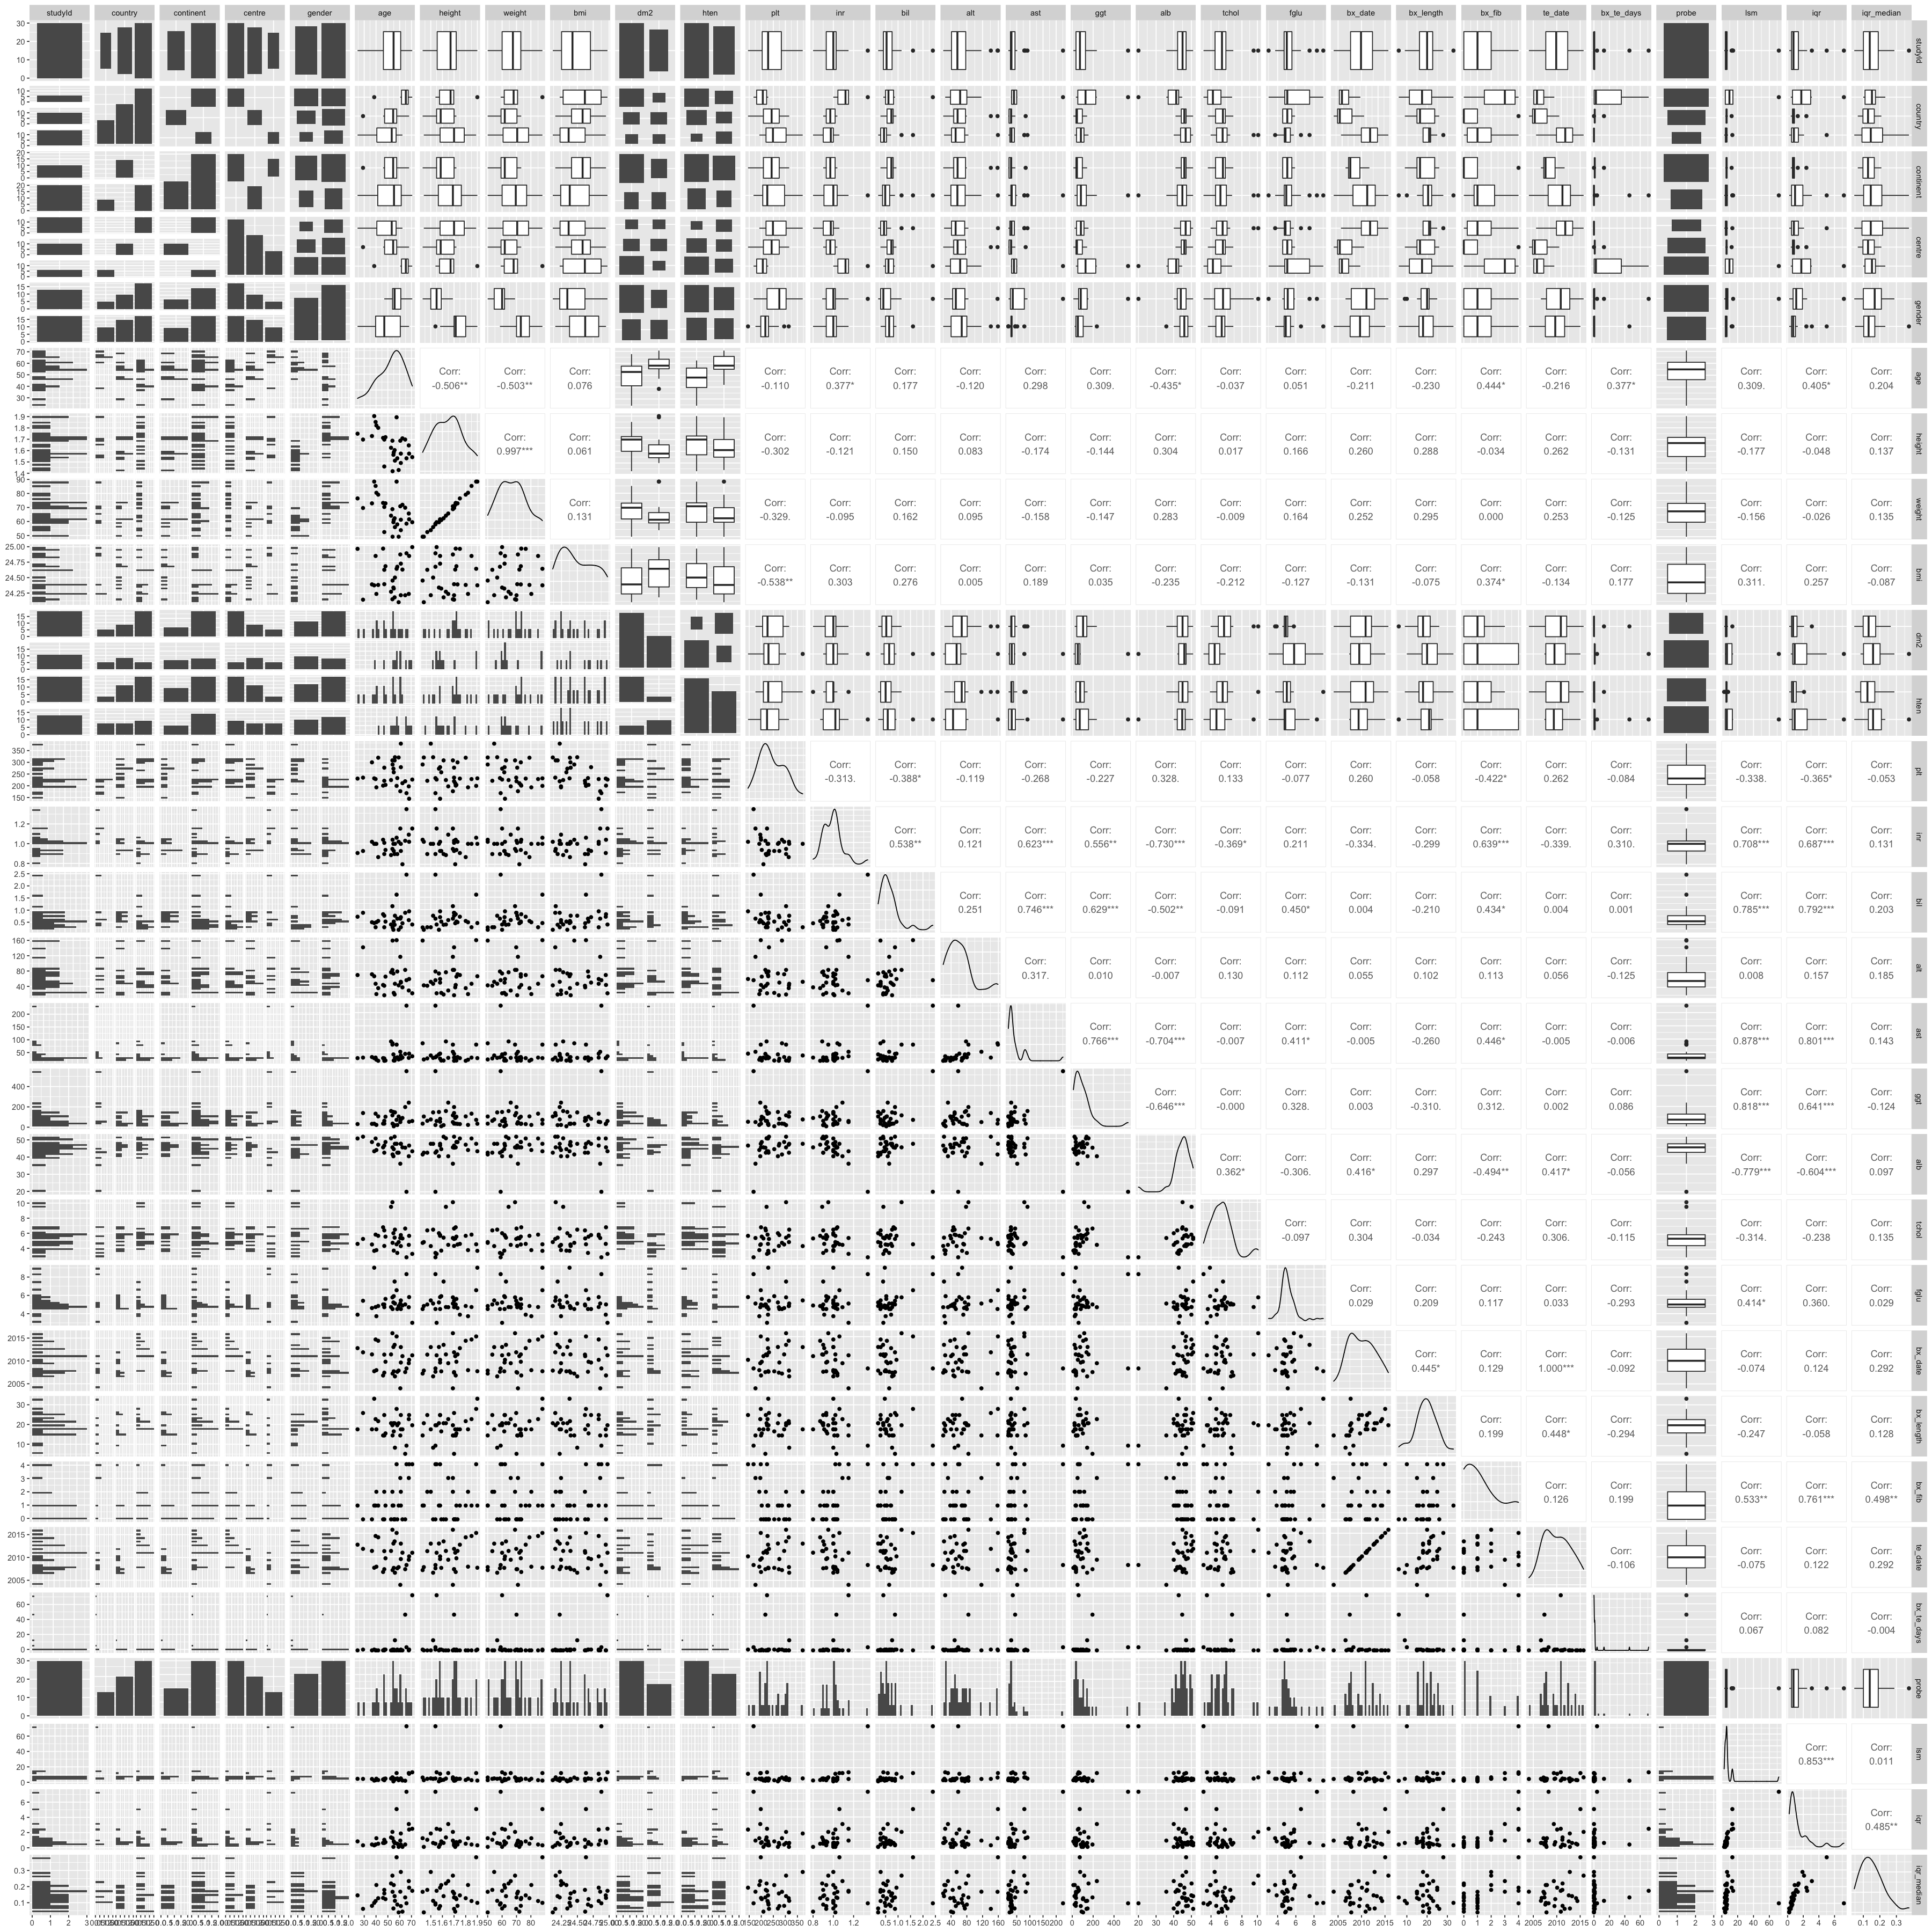

In [15]:
library("GGally") #GGally contains a function that can provide a "gallery" of plots like this  <-  it shows you a comparison of 
options(repr.plot.width=30, repr.plot.height=30) #This is going to be a VERY big, confusing plot! 
ggpairs(data=completeNafldData) 
#R generates a lot of warnings about how there aren't many data points for all of these histograms and maybe we could tell it to do better: 

#I've hidden the bottom of this plot -- click below to show it! 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


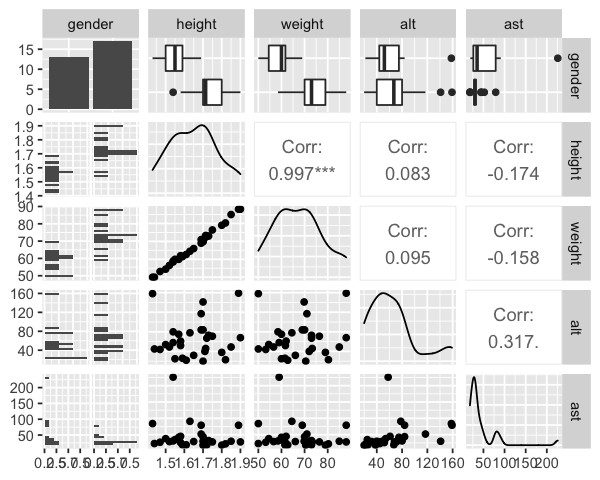

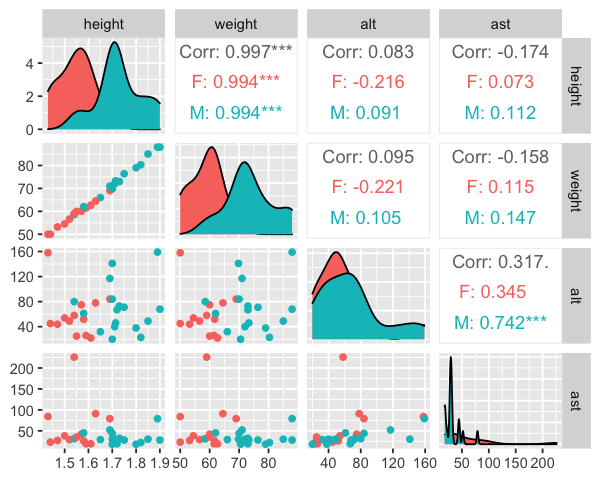

In [16]:
#Yikes, that's a confusing plot! 

#let's try again, with a subset of the variables: 

options(repr.plot.width=5, repr.plot.height=4) #Set this back to what we had before 
ggpairs(data=completeNafldData, columns=c(5,7:8,15:16))
# We could also do the same thing, and colour by another factor -- gender, let's say, which is column 5: 
ggpairs(data=completeNafldData, columns=c(7:8,15:16),mapping=aes(color=gender))

You'll notice how it's comparatively easy to explore relationships between really quite complicated datasets like this. 

One of the things that `ggpairs` has done has shown you a $p$-value for correlation of height and weight. R is designed for stats: let's perform a pearson correlation test to check for this -- the result "cor" tells us Pearson's $r$ and $p$ is essentially a $t$-test on that value being equal to zero. 

In [61]:
cor.test(completeNafldData$height, completeNafldData$weight) 
#Note, if you want to try, say, Spearman's rank, add method="spearman" above! 


	Pearson's product-moment correlation

data:  completeNafldData$height and completeNafldData$weight
t = 63.36, df = 28, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9926377 0.9983669
sample estimates:
      cor 
0.9965308 


We've just performed our first proper statistical test in R. Once you've got the data in, they tend to be pretty obvious. And here, there is a highly significant correlation between height and weight (which is unsurprising). 

If you're worried about multiple comparisons here -- good. I'm not suggesting that we need to look at all pairwise correlations between these variables (though we could!). 

It's worth mentioning at this point that R has a built in function for dealing with the problem of multiple-testing: it's called `p.adjust` and it adjusts p-values based on the number of tests you've done. Here's an example of how it works: we save each test we do, extract the p-values, and then give them to `p.adjust`: 

In [66]:
t1 <- cor.test(completeNafldData$height, completeNafldData$weight) 
t2 <- cor.test(completeNafldData$alb, completeNafldData$inr) #Plasma serum albumin and the international normalised ratio of blood clotting are significantly anticorrelated: 
t2

#Let's now adjust these two p-values: 
pValues <- c(t1$p.value,t2$p.value)
print("Unadjusted p-values:")
print(pValues)
print("Adjusted p-values:")
p.adjust(pValues, method="bonferroni")


	Pearson's product-moment correlation

data:  completeNafldData$alb and completeNafldData$inr
t = -5.6539, df = 28, p-value = 4.663e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8633035 -0.5018538
sample estimates:
       cor 
-0.7301162 


[1] "Unadjusted p-values:"
[1] 8.770110e-32 4.663431e-06
[1] "Adjusted p-values:"


[1] 1.754022e-31 9.326861e-06

* **Q2.4:** Plot and explore more of this surprisingly rich dataset. Try and find two more variables that are correlated with each other. This process of "looking around and seeing what you have" is often called "exploratory data analysis" by proponents of it, or "data dredging" by those who dislike it! 


## Control statements in R
In the previous part we have seen how to manipulate variables and store data or meta-data in them. However, the point in having data stored in variables is to do something with them and this can be achieved in a number of ways. R has a rich collection of function packages (curated on [The Comprehensive R Archive Network](https://cran.r-project.org)) offering functions that perform specific tasks (e.g. the ```boot``` package contains functions allowing easy bootstrapping methods, ```ggplot2``` is used for data plotting extensively as above, ```dplyr``` allows for fast data manipulation, ```mada``` provides help with meta-analyses). However, when a function is not already available, we can use classical programming approaches to write it. Variables and data storage is one part of such a strategy. Using control statements is another. 

One such control statement is the conditional statement ```if (...) {} else {}```. The statement in the round brackets has to be a logical expression. If that expression evaluates to TRUE, the statements in the first set of curly brackets are executed. If the conditional expression evaluates to FALSE, the statements in the second pair of curly brackets are executed. Note that an ```else``` branch is not mandatory.

## Relational and advanced vector operators

There are a bunch of different logical operators you could have here -- some of them we've used above, in disguise. These logical operators, such as `==`, which assess equality (i.e. `1==0` is `FALSE` and `1==1` is `TRUE`) are _really_ useful when trying to subset data too, as well as control program flow. 

For example, we can subset data out of a variable by writing structures like `completeNafldData$height[completeNafldData$weight==69.8]` -- and return the height of any participant whose weight is 69.8 kg. 

Here's a full table of all of these logical operators that R has: 


Operator |  Description
---------|---------------------------------------------------------
<        | Less than
<=       | Less than or equal
>        | Greater than
>=       | Greater than or equal
==       | Equality
!=       | Inequality
%%       | Remainder of vector on the left with vector on the right
%/%      | Division of vector on the left by vector on the right
%in%     | Identify element on left side of operator in vector on right side
%\*%     | Matrix multiplication

Let's demonstrate some of these perhaps more complex ones, such as `%in%`: 


In [4]:
steatosisStage <- c("S0", "S0", "S2", "S1", "S2", "S0", "S1", "S3", "S1", "S2", "S3")
if ("S1" %in% steatosisStage) {
    print("There are patients with steatosis grade 1.")
} else {
    print("There are no patients with steatosis grade 1")
}

[1] "There are patients with steatosis grade 1."


Looping statements are designed to perform the same task multiple times depending on some criterion. R offers the ```while```, and ```for``` loops for this purpose. ```while``` loops are testing a logical expression before executing the task that needs to be repeated and are typically used in cases where the number of necessary repetitions is not known in advance (e.g. the Euclidean algorithm to determine the greatest common divisor). When the number of repetitions is known in advance (e.g. data stored in an array has to be plotted and the size of the array is known), a ```for``` loop is used. Two examples below demonstrate the difference between the two looping structures.

In [16]:
# We are going to generate the first n Fibonacci numbers
# using a while loop.
counter <- 0
fibo1 <- 1
fibo2 <- 1
aux <- 0
n <- 10
if (n == 1) {
    print(fibo1)
} else {
    while (counter < n) {
        if (counter == 0) {
            print(fibo1)
            print(fibo2)
            counter <- counter + 2
        }
        aux <- fibo2
        fibo2 <- fibo1 + fibo2
        fibo1 <- aux
        print(fibo2)
        counter <- counter + 1
    }
}

[1] 1
[1] 1
[1] 2
[1] 3
[1] 5
[1] 8
[1] 13
[1] 21
[1] 34
[1] 55


In [9]:
# This is an inefficient way of generating squares of integers,
# but it is a good illustration of how the for loop works.
v <- c(1, 2, 3, 4, 5, 6, 7)
for (idx in v) {
    print(idx ^ 2)
}

[1] 1
[1] 4
[1] 9
[1] 16
[1] 25
[1] 36
[1] 49


In [ ]:
# What would be a more efficient and elegant way of printing all the perfect squares that are less than 50?
# Fill in the blanks. Hint: there is no need for more than these two lines of code.
v <- seq(...)
print(...)

It is possible to interrupt the execution of a loop by using the ```break``` statement. Conversely, it is possible to skip an iteration and jump to the next one (or outside the loop if the looping condition is no longer TRUE) by using the ```next``` statement.

## Dplyr and "subsetting" data 

Let's go back to the example patient data above. Often, we want to pull out bits of data and explore it in depth -- or compare different hypotheses between them. 

One package, again from the tidyverse, that is very good at doing this is called `dplyr` (pronounced "deployer" or "deplyer") which uses a slightly different notation again, that of _pipes_. A pipe takes data from the left and shoves it into the data on the right. This, again, is a bit funky to look at, but allows you to write code that is similar in spirit to the use of `if`, `else`, and similar.

Whilst the [documentation](https://dplyr.tidyverse.org/) is quite good (albeit sometimes a bit up itself!) it's a good idea to illustrate this with an example: let's select male and female diabetic patients with a BMI less than 25, and see if there's a difference in liver ALT between them: 

In [5]:
library(dplyr)

In [18]:
groupF <- completeNafldData %>% filter(gender == "F") %>% filter(dm2 == "Y") %>% filter(bmi <= 25) #You can quite easily see how this generalises... 
groupM <- completeNafldData %>% filter(gender == "M") %>% filter(dm2 == "Y") %>% filter(bmi <= 25)

t.test(groupF$alt, groupM$alt) #Note: the default is an unequal variance welch test. 
t.test(groupF$alt, groupM$alt,var.equal=T) #Note: You can do an equal variance t-test with var.equal=T; or a paired test with paired=T..
wilcox.test(groupF$alt, groupM$alt)#Or a wilcox test! 
print("No!")


	Welch Two Sample t-test

data:  groupF$alt and groupM$alt
t = -1.606, df = 4.7294, p-value = 0.1725
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -100.14634   23.94634
sample estimates:
mean of x mean of y 
     39.5      77.6 



	Two Sample t-test

data:  groupF$alt and groupM$alt
t = -1.7432, df = 9, p-value = 0.1153
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -87.5411  11.3411
sample estimates:
mean of x mean of y 
     39.5      77.6 



	Wilcoxon rank sum exact test

data:  groupF$alt and groupM$alt
W = 6, p-value = 0.1255
alternative hypothesis: true location shift is not equal to 0


[1] "No!"


Dplyr is really powerful. It's possible to do lots of really complex things with it -- for example, `case_when` lets you create new columns conditionally on the basis of other ones. 

* **Q2.5:** Can you quickly plot the distribution of the patients we're t-testing and wilcoxon-testing above? What is their variance? Here, we can use the parameteric `shapiro.test()` on a population of numbers to perform a hypothesis test with the null hypothesis that the data _are_ drawn from a normal distribution and test our assumptions. 

* **Q2.6:** As a learning exercise, try and perform the above task _without_ using dplyr (i.e. using logical expressions and intermediate variables to select the same group of people). You should get the same results! 

## Functions and packages
### Defining your own functions
Functions are program units that perform a well-defined task. The need to organise code into functions arises when a particular task needs to be repeated throughout a code. Functions are also helpful for structuring a code and increasing readability for yourself and other users.  
In R function definitions are described in the following way:  
```
functionName <- function(argument1, argument2, argument3=1...) {
   functionBody
   returnStatement
}
```  
Let's now examine the different parts of a function as given above:  
* ```functionName``` - is an arbitrary name chosen to refer to the function. This name will be used throughout the code whenever a function call is necessary.
* ```argument1, argument2, argument3=1, ...``` - these are arguments of the function and are used to pass on information to the function. These placeholders are populated with actual values (numeric, logical etc.) when the function is called. Some functions may not have any arguments at all, and some arguments may be pre-defined, i.e. they can have default values, like ```argument3```.
* ```functionBody``` - contains the code of the function that will perform a specific task.
* ```returnStatement``` - While in most programming languages the return value has to be preceded by a specific keyword, in R it is the last statement in the body of the function that constitutes the return value of the function.  

Let's now take a look at a real-world function. Assuming that you have a data set with patients' blood test results, you realise that the cholesterol measurements (LDL, HDL and total) are all in mmol/l but you need them to be in mg/dl for a report. Having all the data loaded into R, it will be easier to write a function that does the conversion than to do it manually. Luckily, all three cholesterol types can be converted between the two units using the same formula.
Below is an example of how we could convert from mmol/l to mg/dl.

In [18]:
cholesterolMmolToMg <- function(value) {
    value * 38.67
}

In [25]:
cholesterolMmolToMg <- function(value) {
    value * 38.67
}
totalCholesterol <- c(5.59, 5.69, 4.60, 5.43, 6.05, 5.51, 4.91, 4.06, 5.46, 5.48)
cholesterolMmolToMg(totalCholesterol)

[1] 216.1653 220.0323 177.8820 209.9781 233.9535 213.0717 189.8697 157.0002
 [9] 211.1382 211.9116

For the sake of completeness, let's also consider having the reverse operation, i.e. going from mg/dl to mmol/l. A function performing this task can be written in a very similar fashion to the one above.

* **Q2.7:** Having too many functions can sometime lead to code fragmentation and, especially for complementary operations like unit conversions, it is possible to merge the two functionalities in a single function. Write a function that converts a given value into mmol/l or mg/dl, by using a second argument that indicates the unit to convert into.

In [17]:
cholesterolUnitChange <- function(value, direction) {
    ...
}

* **Q2.8:** Can we pass on a vector to this function? If yes, what happens if one or more elements of that vector are NA? Here's some test data to play with: 

In [ ]:
totalCholesterol <- c(5.59, 5.69, 4.60, 5.43, 6.05, 5.51, 4.91, 4.06, 5.46, 5.48)  # In mmol/l
totalCholesterolMg <- cholesterolUnitChange(totalCholesterol, "mg/dl")

totalCholesterolIncomplete <- c(5.59, 5.69, 4.60, 5.43, NA, 5.51, 4.91, NA, 5.46, 5.48)  # In mmol/l
totalCholesterolMg <- cholesterolUnitChange(totalCholesterolIncomplete, "mg/dl")

### Useful functions included in base R
The base package (loaded automatically whenever you start R) contains a whole host of utility functions that can be used in day-to-day data manipulation tasks.  
The list below contains some of the more frequently used functions along with a brief description of how they work.

* __`sort(vectorName, decreasing=FALSE)`__ - Sorts the elements of a vector in increasing order. If decreasing is set to TRUE, the function will sort the elements of the vector in decreasing order.
* __`unlit(listName)`__ - transforms a list into a vector. If list elements are of different types, they will be converted in the more "permissive" data type. E.g. if there are numeric and character/string elements in a list, the resulting vector will contain string elements. If there are numeric and logical elements, the resulting vector will contain numeric elements. If there are string and logical elements, the resulting vector will contain string elements.
* __`colSums(arrayName, na.rm=FALSE)`__ - return sums of elements in columns of an array.
* __`rowSums(arrayName, na.rm=FALSE)`__ - return sums of elements in rows of an array.
* __`apply(arrayName, margin, functionName)`__ - A function is applied to elements of an array or matrix. The subset of elements across which to apply the function are determined by margin, which can be 1 for rows, 2 for columns, c(1, 2) for rows and columns etc. Example: assuming myArray is a 3x3x2 array, ```apply(myArray, c(1), mean)``` will return the means across rows in the two matrices in myArray.
* __`lapply(listName, functionName)`__ - Applies a function on list elements and returns the result as a list.
* __`sapply(dataStructureName, functionName)`__ - Applies a function on a vector, list or data frame and returns a vector or matrix.
* __`tapply(dataStuctureName, index, functionName)`__ - Applies a function on all factors in dataStructureName; the factors to cover are in a list called index.
* __`is.numeric(x)`__, __`is.double(x)`__, __`is.logical(x)`__, etc. - These functions check whether x is of a certain data type (or structure). If so, the functions return TRUE, otherwise they return FALSE.
* __`as.numeric(x)`__, __`as.logical(x)`__, etc. - These functions convert x into a certain data type (or structure). If conversion is not possible (e.g. from character to numeric), NA is returned along with a warning message.
* __`str(dataStructureName)`__ - Displays the structure of an R data structure
* __`summary(dataStructureName)`__ - Displays statistical summaries of a data set, including the `mean()`, `median()` and standard deviation (`sd()`) of it. 
* __`t.test()`, `wilcox.test()`, `cor.test()`__ - The most straightforward stats methods you're already familiar with :-). 


R packages always come with a documentation detailing functions available in that package. The [CRAN](https://cran.r-project.org/) repository will contain these documentation for each package. You might find `vignette()` and `?` particularly helpful too. 

### B. Manipulating data frames
Lots of different measurements are made during scientific experiments, which are then summarised in data tables that can be stored as CSV or XLSX files. In the previous section we saw how to load these data tables into R. In many statistical analyses we don't need the entire table or we want to operate only on a specific subset of a table.  
In this section we will explore possibilities of selecting a subgroup of observations from a table and we will use this knowledge in Part 3 to plot data and perform statistical analyses.  

Let's first load a new data set from ```nafld_dataset2.csv``` and examine the structure of this table.

In [28]:
nafldDataset2 <- read.csv("nafld_dataset2.csv")
str(nafldDataset2)

'data.frame':	77 obs. of  30 variables:
 $ studyId    : Factor w/ 1 level "Boursier": 1 1 1 1 1 1 1 1 1 1 ...
 $ country    : Factor w/ 1 level "France": 1 1 1 1 1 1 1 1 1 1 ...
 $ continent  : Factor w/ 1 level "Europe": 1 1 1 1 1 1 1 1 1 1 ...
 $ centre     : Factor w/ 4 levels "Angers","Bordeaux",..: 2 2 2 1 2 1 2 1 1 1 ...
 $ gender     : Factor w/ 2 levels "F","M": 2 1 1 2 1 2 2 2 1 1 ...
 $ age        : int  58 50 42 72 60 37 48 47 69 71 ...
 $ height     : num  1.77 1.6 1.69 1.66 1.71 1.82 1.76 1.62 1.51 1.55 ...
 $ weight     : num  126 103 115 111 118 ...
 $ bmi        : num  40.2 40.2 40.3 40.3 40.3 40.5 40.7 40.8 40.8 40.8 ...
 $ waist_circ : int  134 123 115 122 124 132 125 124 126 130 ...
 $ dm2        : Factor w/ 2 levels "N","Y": 2 2 1 1 2 1 1 2 2 2 ...
 $ plt        : int  175 266 285 186 239 278 253 334 242 173 ...
 $ alt        : int  49 22 45 13 27 27 85 105 28 26 ...
 $ ast        : int  26 22 28 19 19 28 47 35 30 24 ...
 $ ggt        : int  66 88 31 38 55 68 56 161

You can already notice that there are fewer missing values in this data set than in the previous one. This is in itself a subset of a much larger data set describing patients that had blood serum tests, liver biopsies and liver stiffness measurements - having non-alcoholic fatty liver disease as their underlying condition.  
Now consider the following subgroups:
1. Patients with morbid obesity (BMI > 40 kg/m^2)
2. Patients with biopsy samples longer (bx_length) than 20 mm
3. Patients with abnormal aminotransferase levels (alanine-aminotransferase (ALT) > 40 or aspartate-aminotransferase (AST) > 40)
4. Patients with biopsy samples longer (bx_length) than 20 mm and fibrosis stage (bx_fib) < 3 
5. Patients with unreliable liver stiffness measurements (median LSM >= 7.1 kPa (lsm) and IQR/median LSM > 0.30 (iqr_median))
6. Patients with biopsy samples shorter than 20 mm and unreliable liver stiffness measurements.

We will determine the number of patients in each of these subgroups.

In [40]:
# Patients with morbid obesity
morbidlyObese <- nafldDataset2[nafldDataset2$bmi > 40,]
# Now count the number of patients
print(cat(c("There are ", as.character(nrow(morbidlyObese)), " patients.\n")))
# Finally, let's have a look at the results
print(morbidlyObese)


There are  74  patients.
NULL
      studyId country continent   centre gender age height weight  bmi
1    Boursier  France    Europe Bordeaux      M  58   1.77  126.0 40.2
2    Boursier  France    Europe Bordeaux      F  50   1.60  103.0 40.2
3    Boursier  France    Europe Bordeaux      F  42   1.69  115.0 40.3
4    Boursier  France    Europe   Angers      M  72   1.66  111.0 40.3
5    Boursier  France    Europe Bordeaux      F  60   1.71  117.8 40.3
6    Boursier  France    Europe   Angers      M  37   1.82  134.0 40.5
7    Boursier  France    Europe Bordeaux      M  48   1.76  126.0 40.7
8    Boursier  France    Europe   Angers      M  47   1.62  107.0 40.8
9    Boursier  France    Europe   Angers      F  69   1.51   93.0 40.8
10   Boursier  France    Europe   Angers      F  71   1.55   98.0 40.8
11   Boursier  France    Europe Bordeaux      F  43   1.50   92.0 40.9
12   Boursier  France    Europe Bordeaux      F  60   1.60  105.0 41.0
13   Boursier  France    Europe   Angers      F

We notice that there are some rows with NAs in them. We'd like to remove these as we're only interested in patients who are morbidly obese.

In [42]:
# Select patients with BMI > 40 kg/m^2 AND patients whose BMI isn't a NA value.
morbidlyObese <- nafldDataset2[nafldDataset2$bmi > 40 & !is.na(nafldDataset2$bmi),]
print(cat(c("There are ", as.character(nrow(morbidlyObese)), " patients.\n")))
print(morbidlyObese)

There are  71  patients.
NULL
    studyId country continent   centre gender age height weight  bmi waist_circ
1  Boursier  France    Europe Bordeaux      M  58   1.77  126.0 40.2        134
2  Boursier  France    Europe Bordeaux      F  50   1.60  103.0 40.2        123
3  Boursier  France    Europe Bordeaux      F  42   1.69  115.0 40.3        115
4  Boursier  France    Europe   Angers      M  72   1.66  111.0 40.3        122
5  Boursier  France    Europe Bordeaux      F  60   1.71  117.8 40.3        124
6  Boursier  France    Europe   Angers      M  37   1.82  134.0 40.5        132
7  Boursier  France    Europe Bordeaux      M  48   1.76  126.0 40.7        125
8  Boursier  France    Europe   Angers      M  47   1.62  107.0 40.8        124
9  Boursier  France    Europe   Angers      F  69   1.51   93.0 40.8        126
10 Boursier  France    Europe   Angers      F  71   1.55   98.0 40.8        130
11 Boursier  France    Europe Bordeaux      F  43   1.50   92.0 40.9        110
12 Boursie

**Q2.9**: Counting elements in a column based on a constraint should be as complicated as you saw in the previous two examples. It can be done in one line, using functions covered earlier. Use the box below to come up with a simple way of getting the number of morbidly obese patients in the data set.

Let's now count how many patients have abnormal aminotransferase levels (alanine-aminotransferase (ALT) > 40 or aspartate-aminotransferase (AST) > 40).

In [56]:
# Select patients with abnormal ALT or AST
abnormalAminotransferase <- nafldDataset2[(nafldDataset2$alt > 40 | nafldDataset2$ast > 40) &
                                          !is.na(nafldDataset2$alt) & !is.na(nafldDataset2$ast),]
# Count the patients
print(cat(c("There are ", as.character(nrow(abnormalAminotransferase)), " patients.\n")))
# Inspect the data
str(abnormalAminotransferase)

There are  37  patients.
NULL
'data.frame':	37 obs. of  30 variables:
 $ studyId    : Factor w/ 1 level "Boursier": 1 1 1 1 1 1 1 1 1 1 ...
 $ country    : Factor w/ 1 level "France": 1 1 1 1 1 1 1 1 1 1 ...
 $ continent  : Factor w/ 1 level "Europe": 1 1 1 1 1 1 1 1 1 1 ...
 $ centre     : Factor w/ 4 levels "Angers","Bordeaux",..: 2 2 2 1 2 1 1 2 2 1 ...
 $ gender     : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 1 1 2 2 ...
 $ age        : int  58 42 48 47 43 33 70 50 44 56 ...
 $ height     : num  1.77 1.69 1.76 1.62 1.5 1.75 1.57 1.63 1.82 1.8 ...
 $ weight     : num  126 115 126 107 92 126 102 110 100 135 ...
 $ bmi        : num  40.2 40.3 40.7 40.8 40.9 41.1 41.4 41.4 30.2 41.7 ...
 $ waist_circ : int  134 115 125 124 110 134 144 115 126 140 ...
 $ dm2        : Factor w/ 2 levels "N","Y": 2 1 1 2 2 2 2 1 2 1 ...
 $ plt        : int  175 285 253 334 408 310 165 194 208 209 ...
 $ alt        : int  49 45 85 105 118 62 41 49 92 117 ...
 $ ast        : int  26 28 47 35 77 27 36 34 45 46

**Q2.10**: Determine the number of patients in each of the other subgroups (2 and 4-6).

# Concluding remarks 

Here, we've explored dataframes quite a lot more considerably in R, and done a few analyses. We've largely covered the main tools used by the course, with the exception of regression methods. A lot of our time has been spent on getting data into, and out of, the computer. Many of the analyses we've done so far are comparatively straightforward -- and the comptuer gives us the answer in microseconds to questions that may take substantially longer to answer by hand. 